In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import segmentation_models as sm
loss_fun = sm.losses.CategoricalFocalLoss(alpha=0.25, gamma=2.0, class_indexes=None)

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from PIL import Image
import glob
from tensorflow.keras import backend as K
import cv2
import os
import random
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger


In [ ]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 1
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)

In [ ]:
path = glob.glob("/content/drive/MyDrive/last2 image/*.png")
path.sort()


IndexError: ignored

In [ ]:
train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/last2 image/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):

      print(img_path)
        # img = cv2.imread(img_path,0)
        # # img = cv2.resize(img, (512, 512))
        # train_images.append(img)



# #Convert list to array for machine learning processing
# train_images = np.array(train_images)


# train_masks = []
# for directory_path in glob.glob("/content/drive/MyDrive/last2/"):
#     for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
#         mask = cv2.imread(mask_path,0)
#         # mask = cv2.resize(mask, (512, 512), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
#         train_masks.append(mask)

# train_masks = np.array(train_masks)
# np.unique(train_masks)
cv2_imshow(train_images[2])

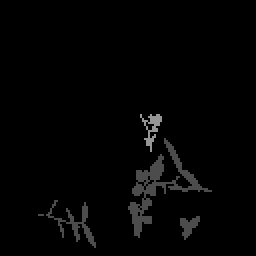

In [ ]:
train_masks = []
for directory_path in glob.glob("/content/drive/MyDrive/last2/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path,0)
        # mask = cv2.resize(mask, (512, 512), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)

cv2_imshow(train_masks[2])

In [ ]:

#Convert list to array for machine learning processing
train_images = np.array(train_images)


train_masks = []
for directory_path in glob.glob("/content/drive/MyDrive/last2/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path,0)
        # mask = cv2.resize(mask, (512, 512), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)

train_masks = np.array(train_masks)
np.unique(train_masks)

In [ ]:
n_classes = 3

train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/last2 image/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path,0)
        # img = cv2.resize(img, (512, 512))
        train_images.append(img)


#Convert list to array for machine learning processing
train_images = np.array(train_images)


train_masks = []
for directory_path in glob.glob("/content/drive/MyDrive/last2/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path,0)
        # mask = cv2.resize(mask, (512, 512), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)

train_masks = np.array(train_masks)
np.unique(train_masks)


###############################################
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)
#################################################
train_images = np.expand_dims(train_images, axis=3)
train_images = tensorflow.keras.utils.normalize(train_images, axis=1)
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

#Create a subset of data for quick testing
#Picking 10% for testing and remaining for training
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.20, random_state = 0)

#Further split training data to smaller subset for quick testing of models
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

# from sklearn.utils import to_categorical
import tensorflow as tf

train_masks_cat = tf.keras.utils.to_categorical (y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

val_masks_cat = tf.keras.utils.to_categorical (y_val, num_classes=n_classes)
y_val_cat = val_masks_cat.reshape((y_val.shape[0], y_val.shape[1], y_val.shape[2], n_classes))



test_masks_cat = tf.keras.utils.to_categorical (y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes = np.unique(train_masks_reshaped_encoded),
                                                 y = train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class values in the dataset are ...  [0 1 2]
Class weights are...: [ 0.35975859  5.8117839  20.70647709]


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K



'''
A few useful metrics and losses
'''

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)



In [ ]:
##############################################################
'''
Useful blocks to build Unet
conv - BN - Activation - conv - BN - Activation - Dropout (if enabled)
'''


def conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv

In [ ]:
def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn


In [ ]:
def Attention_UNet(input_shape, NUM_CLASSES=3, dropout_rate=0.0, batch_norm=True):
    '''
    Attention UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('softmax')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="Attention_UNet")
    return model


In [ ]:
import segmentation_models as sm
loss_fun = sm.losses.CategoricalFocalLoss(alpha=0.25, gamma=2.0, class_indexes=None)

In [ ]:
model = Attention_UNet(input_shape, NUM_CLASSES=3, dropout_rate=0.0, batch_norm=True)
model.compile(optimizer='adam', loss=loss_fun, metrics=["accuracy",
                                                        tf.keras.metrics.MeanIoU(3),
                                                        sm.metrics.IOUScore(threshold=0.5),
                                                        tf.keras.metrics.Precision(),
                                                        tf.keras.metrics.Recall(),
                                                        [jacard_coef],
                                                        [dice_coef],
                                                        sm.metrics.FScore(threshold=0.5)])
model.summary()


In [ ]:
input_shape

In [ ]:
log_csv = CSVLogger('/content/drive/MyDrive/my_logs.csv', separator=',', append=True)
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
file_path = '/content/drive/MyDrive/0_epoch_weights/epochno-{epoch:04d}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='dice_coef', verbose=1, save_best_only=True, mode='max',save_freq="epoch")


tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='/content/drive/MyDrive/0ten/Tensorboard_logs',
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq='epoch',
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None,
)

callbacks_list = [log_csv,early_stop,checkpoint,tensorboard_callback]

In [ ]:
from keras.models import load_model

In [ ]:
# from keras.models import load_model
model = load_model('/content/drive/MyDrive/0_epoch_weights/epochno-0026.hdf5',custom_objects={'focal_loss':loss_fun,
                                                                                 'iou_score':sm.metrics.IOUScore(threshold=0.5),
                                                                                 "jacard_coef":jacard_coef,
                                                                                 "dice_coef":dice_coef,
                                                                                 'f1-score':sm.metrics.FScore(threshold=0.5)})


In [ ]:
_ ,acc = model.evaluate(X_test, y_test_cat)
print('Accuracy is =',(acc*100.0),'%')


In [ ]:
history = model.fit(X_train, y_train_cat,
                    batch_size = 16,
                    initial_epoch =23,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_val, y_val_cat),
                    callbacks=[callbacks_list],
                    shuffle=False)

In [ ]:
###
#plot the training and validation accuracy and loss at each epoch
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = model.history['acc']
val_acc = model.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


TypeError: ignored

In [ ]:
acc = history.model['acc']
val_acc = history.model['val_acc']


NameError: ignored

In [ ]:
##################################
# #model = get_model()
# model.load_weights('/content/drive/MyDrive/unet+crossentropy.h5')
# #model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')

# #IOU
y_pred=model.predict(X_test)
# y_pred_argmax=np.argmax(y_pred, axis=-1)

##################################################


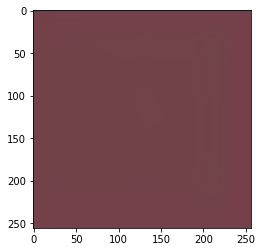

In [ ]:
plt.imshow(y_pred[0],cmap='gray')

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 3
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())




Mean IoU = 0.30928126


In [ ]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

[[2918744.       0.       0.]
 [ 180420.       0.       0.]
 [  46564.       0.       0.]]


In [ ]:

class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2]  + values[1,0]+ values[2,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[0,1]+ values[2,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1]  + values[0,2]+ values[1,2])
# class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])


IndexError: ignored

IoU for class1 is:  0.92784375
IoU for class2 is:  0.0
IoU for class3 is:  0.0


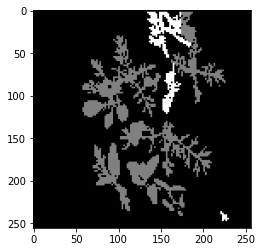

In [ ]:
print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
# print("IoU for class4 is: ", class4_IoU)

# plt.imshow(train_images[0, :,:,0], cmap='gray')
plt.imshow(train_masks[0], cmap='gray')
plt.imshow(y_pred[0],cmap='gray')

In [ ]:
# Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')
model = load_model('/content/drive/MyDrive/0_epoch_weights/epochno-0026.hdf5',custom_objects={'focal_loss':loss_fun,
                                                                                 'iou_score':sm.metrics.IOUScore(threshold=0.5),
                                                                                 "jacard_coef":jacard_coef,
                                                                                 "dice_coef":dice_coef,
                                                                                 'f1-score':sm.metrics.FScore(threshold=0.5)})


import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()


In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
print()
# plt.imshow(test_img[:,:,0])
# # plt.imshow(ground_truth[:,:,0])

In [ ]:
plt.imshow(ground_truth[:,:,0])

In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
print(test_img_number)

cv2_imshow(X_test[test_img_number])

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
img =cv.imread(X_test[0],1)
cv2_imshow(img)

SystemError: ignored

In [ ]:
model.fit(x_train, y_train, initial_epoch=9, epochs=19, callbacks=[Tensorboard()]